In [68]:
import requests
import json
import time
import os
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# Функция для получения всех населенных пунктов и их id в указанной стране
def get_cities(country):
    req = requests.get('https://api.hh.ru/areas')
    data = req.content.decode()
    req.close()
    jsObj = json.loads(data)
    cities = []
    for country_ in jsObj:
        if country_['name'] == country:
            for area_ in country_['areas']:
                if len(area_['areas']) != 0:
                    for city_ in area_['areas']:
                        cities.append([city_['id'], city_['name']])
                else:
                    cities.append([area_['id'], area_['name']])

    return cities

In [70]:
# Функция для получение вакансий
def get_hh_vacancies(text, area):
    url = f"https://api.hh.ru/vacancies?text={text}&area={area}&per_page={100}"
    page = 0
    vacancies = []
    while True:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        vacancies.append(data)
        if 'pages' in data and page < data['pages']:
            page += 1
            url = f"https://api.hh.ru/vacancies?text={text}&area={area}&per_page={100}&page={page}"
        else:
            break
    return vacancies

In [71]:
# Получаем список населенных пунктов
all_cities = get_cities('Россия')

In [72]:
cities = ['Москва', 'Воронеж']
cities_id = []
for ac in all_cities:
    for city in cities:
        if city in ac:
            cities_id.append(ac[0])

profiles = ['Data Analyst', 'Data Science', 'Data Engineer']
levels = ['Junior', 'Middle', 'Senior']

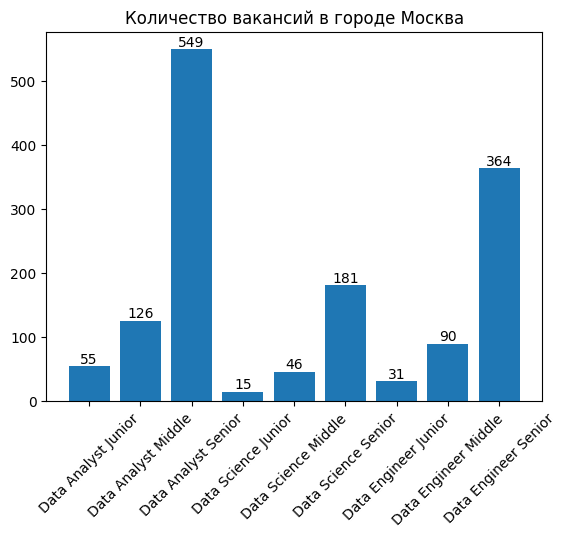

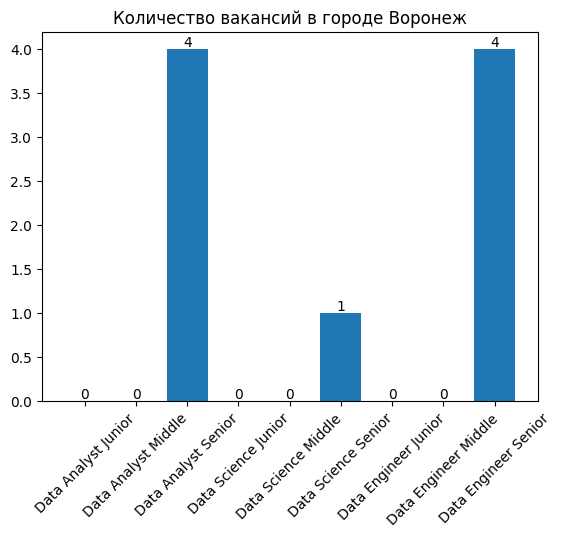

In [73]:
for i in range(len(cities_id)):
    count_dict = {}
    for profile in profiles:
        for level in levels:
            text = f'{profile} {level}'
            count = 0
            for v in get_hh_vacancies(text, cities_id[i]):
                count += len(v['items'])

            count_dict[text] = count


    categories = list(count_dict.keys())
    values = list(count_dict.values())
    bars = plt.bar(categories, values)
    plt.bar_label(bars)


    plt.title(f'Количество вакансий в городе {cities[i]}')
    plt.xticks(rotation=45)
    plt.show()
